In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv('nobel_laureates.csv')

In [97]:
# Check for empty columns using isna() and all()
empty_columns = df.columns[df.isna().all()]
num_empty_columns = len(empty_columns)

print(f"Number of empty columns: {num_empty_columns}")
print("Empty columns:", empty_columns)

Number of empty columns: 0
Empty columns: Index([], dtype='object')


In [98]:
df = pd.read_csv('nobel_laureates.csv', delimiter=',')

# Now, check the first few rows of the DataFrame to verify the data.
print(df.head())

   Year                                   Physics   
0  1901                           Wilhelm Röntgen  \
1  1902             Hendrik Lorentz;Pieter Zeeman   
2  1903  Henri Becquerel;Pierre Curie;Marie Curie   
3  1904                             Lord Rayleigh   
4  1905                            Philipp Lenard   

                      Chemistry Physiology or Medicine   
0  Jacobus Henricus van 't Hoff       Emil von Behring  \
1                  Emil Fischer            Ronald Ross   
2              Svante Arrhenius    Niels Ryberg Finsen   
3                William Ramsay            Ivan Pavlov   
4              Adolf von Baeyer            Robert Koch   

                        Literature                               Peace   
0                  Sully Prudhomme         Henry Dunant;Frédéric Passy  \
1                  Theodor Mommsen  Élie Ducommun;Charles Albert Gobat   
2            Bjørnstjerne Bjørnson                       Randal Cremer   
3  Frédéric Mistral;José Echegaray  

In [99]:
# Replace a character in the 'Column_Name' column with another character or string
df['Physics'] = df['Physics'].str.replace(';', ' ,')

In [100]:
# Replace a character in the 'Column_Name' column with another character or string
df['Economics'] = df['Economics'].str.replace('—', '0')

In [101]:
df.head()

,Year,Physics,Chemistry,Physiology or Medicine,Literature,Peace,Economics
0,1901,Wilhelm Röntgen,Jacobus Henricus van 't Hoff,Emil von Behring,Sully Prudhomme,Henry Dunant;Frédéric Passy,0
1,1902,"Hendrik Lorentz ,Pieter Zeeman",Emil Fischer,Ronald Ross,Theodor Mommsen,Élie Ducommun;Charles Albert Gobat,0
2,1903,"Henri Becquerel ,Pierre Curie ,Marie Curie",Svante Arrhenius,Niels Ryberg Finsen,Bjørnstjerne Bjørnson,Randal Cremer,0
3,1904,Lord Rayleigh,William Ramsay,Ivan Pavlov,Frédéric Mistral;José Echegaray,Institut de Droit International,0
4,1905,Philipp Lenard,Adolf von Baeyer,Robert Koch,Henryk Sienkiewicz,Bertha von Suttner,0


In [102]:
df.tail()

,Year,Physics,Chemistry,Physiology or Medicine,Literature,Peace,Economics
114,2018,"Arthur Ashkin ,Gérard Mourou ,Donna Strickland",Frances H. Arnold;George P. Smith;Greg Winter,James P. Allison; Tasuku Honjo,Olga Tokarczuk[h],Denis Mukwege; Nadia Murad,William Nordhaus; Paul Romer
115,2019,"James Peebles , Michel Mayor , Didier Queloz",John B. Goodenough;M. Stanley Whittingham;Akir...,William Kaelin Jr.;Peter J. Ratcliffe;Gregg L....,Peter Handke,Abiy Ahmed,Abhijit Banerjee;Esther Duflo;Michael Kremer
116,2020,"Roger Penrose , Reinhard Genzel , Andrea M. Ghez",Emmanuelle Charpentier;Jennifer Doudna,Harvey J. Alter; Michael Houghton; Charles M. ...,Louise Glück,World Food Programme,Paul R. Milgrom;Robert B. Wilson
117,2021,"Giorgio Parisi , Klaus Hasselmann , Syukuro Ma...",Benjamin List; David MacMillan,David Julius; Ardem Patapoutian,Abdulrazak Gurnah,Maria Ressa; Dmitry Muratov,David Card;Joshua D. Angrist;Guido W. Imbens
118,2022,"Alain Aspect , John Clauser , Anton Zeilinger",Carolyn R. Bertozzi; Morten P. Meldal; Karl Ba...,Svante Pääbo,Annie Ernaux,Ales Bialiatski; Memorial; Centre for Civil Li...,Ben S. Bernanke; Douglas W. Diamond; Philip H....


In [103]:
total_laureates = 0

# Iterate through each cell in the dataset
for column in df.columns:
    for cell in df[column]:
        # Check if the cell contains a string
        if isinstance(cell, str):
            # Split the cell's text using ',' as the delimiter
            names = cell.split(',')
            
            # Count the number of non-numeric elements and add it to the total count
            total_laureates += sum(1 for name in names if not name.strip().replace('.', '', 1).isdigit())

print("Total Nobel Laureates:", total_laureates)

Total Nobel Laureates: 722


In [104]:
category_counts = {}
year_counts = {}

# Iterate through each cell in the dataset
for column in df.columns:
    for cell in df[column]:
        # Check if the cell contains a string
        if isinstance(cell, str):
            # Split the cell's text using ',' as the delimiter
            names = cell.split(',')
            
            # Count the number of non-numeric elements and add them to the respective dictionaries
            for name in names:
                cleaned_name = name.strip()
                if not cleaned_name.replace('.', '', 1).isdigit():
                    if column not in category_counts:
                        category_counts[column] = 0
                    category_counts[column] += 1

                    year = df['Year'].iloc[df.index[df[column] == cell].tolist()[0]]
                    if year not in year_counts:
                        year_counts[year] = 0
                    year_counts[year] += 1

print("Total Nobel Laureates by Category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

print("\nTotal Nobel Laureates by Year:")
for year, count in year_counts.items():
    print(f"{year}: {count}")

Total Nobel Laureates by Category:
Physics: 222
Chemistry: 114
Physiology or Medicine: 113
Literature: 115
Peace: 104
Economics: 54

Total Nobel Laureates by Year:
1901: 5
1902: 6
1903: 7
1904: 5
1905: 5
1906: 5
1907: 5
1908: 5
1909: 6
1910: 5
1911: 5
1912: 5
1913: 5
1914: 3
1915: 4
1917: 4
1918: 2
1919: 4
1920: 5
1921: 4
1922: 5
1923: 4
1924: 3
1925: 5
1926: 5
1927: 6
1928: 4
1929: 5
1930: 5
1932: 4
1933: 5
1935: 4
1936: 6
1937: 6
1938: 5
1939: 4
1943: 3
1944: 4
1945: 5
1946: 5
1947: 5
1948: 5
1949: 5
1950: 5
1951: 6
1952: 6
1953: 5
1954: 7
1955: 5
1956: 6
1957: 6
1958: 7
1959: 6
1960: 5
1961: 6
1962: 5
1963: 7
1964: 7
1965: 7
1966: 4
1967: 4
1968: 5
1969: 6
1970: 7
1971: 6
1972: 7
1973: 8
1974: 7
1975: 8
1976: 7
1977: 8
1978: 8
1979: 8
1980: 7
1981: 7
1982: 6
1983: 7
1984: 7
1985: 6
1986: 8
1987: 7
1988: 8
1989: 8
1990: 8
1991: 6
1992: 6
1993: 7
1994: 7
1995: 7
1996: 8
1997: 8
1998: 8
1999: 7
2000: 8
2001: 8
2002: 8
2003: 8
2004: 8
2005: 8
2006: 7
2007: 7
2008: 8
2009: 8
2010: 7
2011

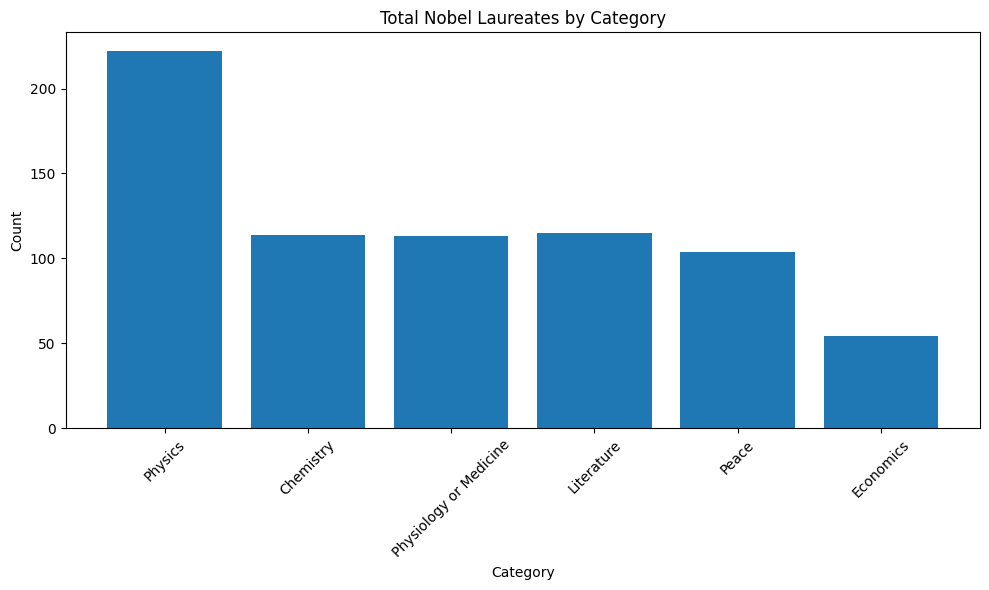

In [105]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values())
plt.title('Total Nobel Laureates by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.tight_layout()
plt.show()


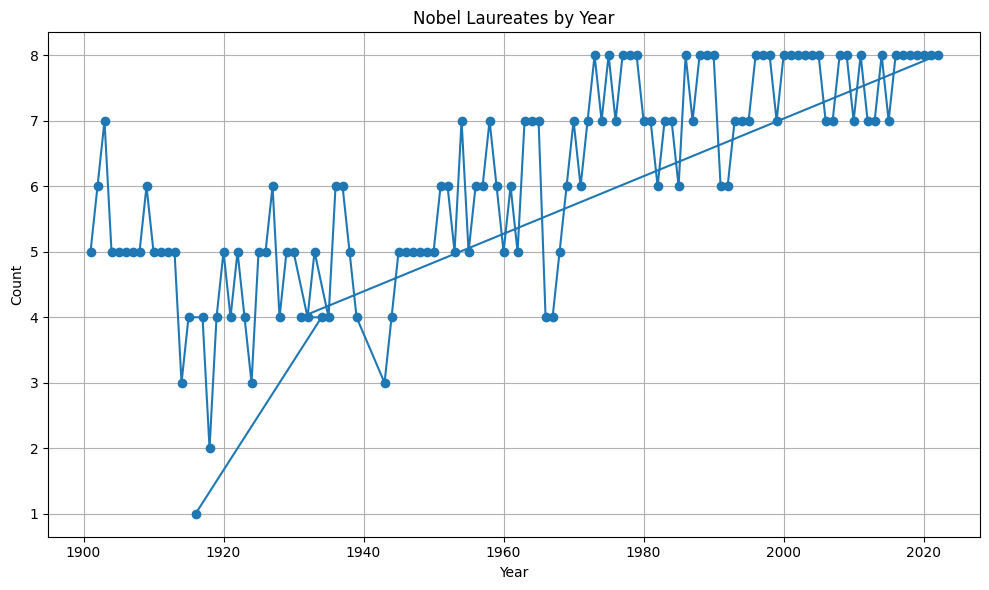

In [106]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(year_counts.keys(), year_counts.values(), marker='o', linestyle='-')
plt.title('Nobel Laureates by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()


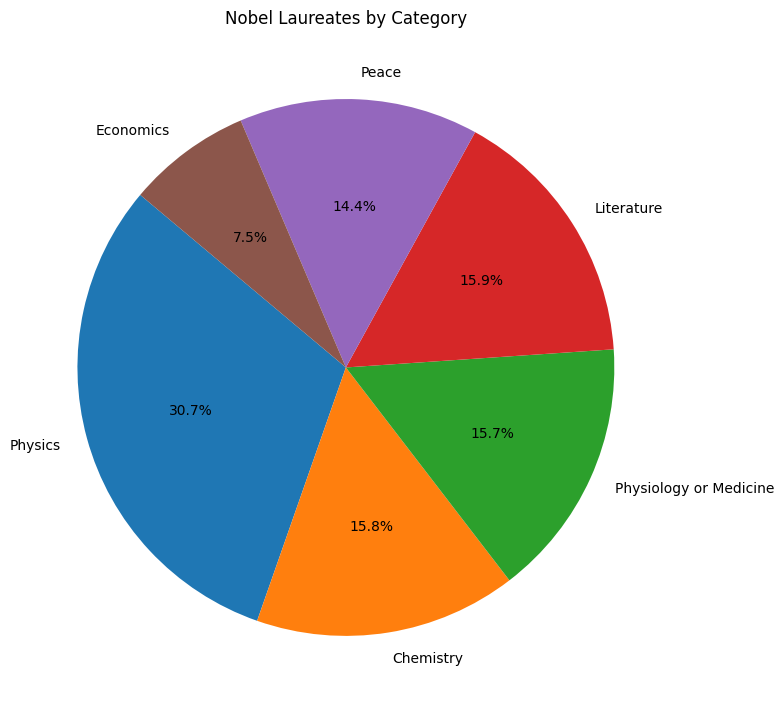

In [107]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Nobel Laureates by Category')

# Show the chart
plt.tight_layout()
plt.show()

In [108]:
df.to_csv('modified_dataset1.csv', index=False)